# Laboratorio 3
Andrea Cecilia Rivas Castañeda - 16001120

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib
import statistics
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import normalize, MinMaxScaler

# Cargamos el Dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

### Eliminar la columna PassengerId

In [4]:
data.drop('PassengerId', axis = 1, inplace=True)

In [5]:
data.shape

(891, 11)

# Análisis de Datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* Se observan 6 variables numericas
* Se observan 5 variables categoricas

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Análisis de datos faltantes

In [8]:
data.isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
dtype: float64

In [9]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum()>0)]
var_with_na

['Age', 'Cabin', 'Embarked']

In [10]:
data[var_with_na].dtypes

Age         float64
Cabin        object
Embarked     object
dtype: object

In [11]:
data.groupby('Survived').count().rsub(data.groupby('Survived').size(), axis=0)[var_with_na]

,Age,Cabin,Embarked
Survived,,,
0,125,481,0
1,52,206,2


* Age: de los 177 missing values, 125 no sobrevivieron y 52 si.
* Cabin: de los 687 missing values, 481 no sobrevivieron y 206 si.
* Embarked: de lo 2 missing values, 2 sobrevivieron.

In [12]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
data[['Survived', 'Age']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


In [14]:
df = data.copy()
var = 'Age'
df['AgeNa'] = np.where(df[var].isnull(), 'Si', 'No')
temp = df.groupby('AgeNa').Survived.agg(['mean', 'std', 'count'])
temp

,mean,std,count
AgeNa,,,
No,0.406162,0.491460,714
Si,0.293785,0.456787,177


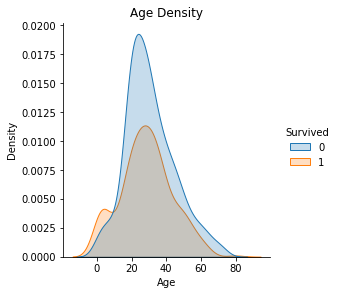

In [15]:
sns.displot(data=df, x="Age", hue="Survived", kind="kde", fill=True, height=4)
plt.title('Age Density')
plt.show()

In [16]:
data.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [17]:
data.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F2             3
              ..
C95            1
E58            1
C50            1
C45            1
D21            1
Name: Cabin, Length: 147, dtype: int64

In [18]:
data.groupby('Survived')['Cabin'].value_counts()

Survived  Cabin      
0         C124           2
          C22 C26        2
          C23 C25 C27    2
          D26            2
          F G73          2
                        ..
1         E49            1
          E50            1
          E67            1
          E68            1
          F E69          1
Name: Cabin, Length: 163, dtype: int64

In [19]:
statistics.mode(df.Cabin), statistics.mode(df.Cabin.dropna())

(nan, 'G6')

In [20]:
data.drop('Cabin', axis = 1, inplace=True)

* Se recomienda no tomar en cuenta la variable *Cabin*, ya que el 77% de los datos son Nas

### Variable Embarked
* Port of Embarkation

In [21]:
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
data.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [24]:
data.groupby('Survived').count().rsub(data.groupby('Survived').size(), axis=0)['Embarked']

Survived
0    0
1    2
Name: Embarked, dtype: int64

* Se seleccionó el valor 'S' ya que se tiene la probabilidad más alta de pertenecer a ese grupo. 

## Transformación de Vars. Categóricas

In [25]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Name', 'Sex', 'Ticket', 'Embarked']

### Variable *Name*

In [26]:
data['Name'].value_counts()

Pekoniemi, Mr. Edvard                1
Davies, Master. John Morgan Jr       1
Gilnagh, Miss. Katherine "Katie"     1
Coleridge, Mr. Reginald Charles      1
Lindblom, Miss. Augusta Charlotta    1
                                    ..
Jacobsohn, Mr. Sidney Samuel         1
Skoog, Mr. Wilhelm                   1
Hunt, Mr. George Henry               1
Molson, Mr. Harry Markland           1
Braund, Mr. Owen Harris              1
Name: Name, Length: 891, dtype: int64

* Se recomienda eliminar esta columna.

In [27]:
data.drop('Name', axis = 1, inplace=True)

### Variable *Sex*

In [28]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
data.Sex = data['Sex'].replace('male', 0)
data.Sex = data['Sex'].replace('female', 1)
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

### Variable *Ticket*

In [30]:
enc_ticket = data['Ticket'].value_counts()/data.shape[0]
enc_ticket

CA. 2343             0.007856
1601                 0.007856
347082               0.007856
347088               0.006734
CA 2144              0.006734
                       ...   
364500               0.001122
2695                 0.001122
2690                 0.001122
350035               0.001122
STON/O 2. 3101293    0.001122
Name: Ticket, Length: 681, dtype: float64

In [31]:
data.Ticket = data['Ticket'].apply(lambda x : enc_ticket[x])

* Se seleccionó frequency encoding

### Variable *Embarked*

In [32]:
enc_embarked = {'Na':0, 'S': 1, 'C': 2, 'Q': 3}#data.Embarked.value_counts().to_dict()
enc_embarked

{'Na': 0, 'S': 1, 'C': 2, 'Q': 3}

* Se recomienda realizar una sustitución de valores

# Variables Numericas

In [33]:
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
num_vars

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Vars. Discretas

In [34]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['Pclass', 'SibSp', 'Parch']

In [35]:
# Función para graficar el texto en las gráficas de barras
def text_stacked(ax):
    for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        label_text = height
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center',    va='center')

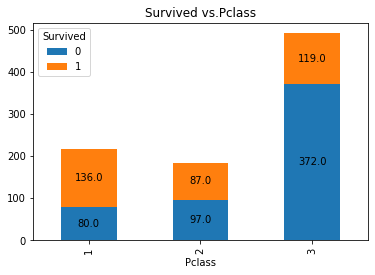

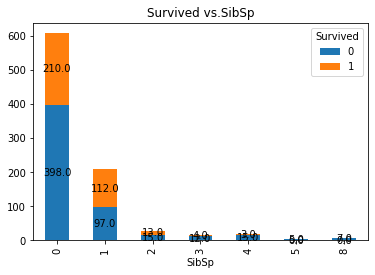

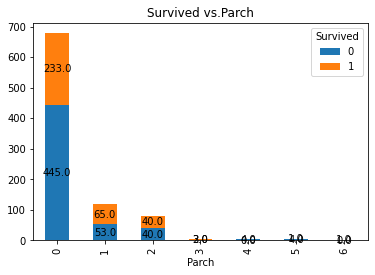

In [36]:
for var in discrete_vars:
    df_stack = df.groupby([var, 'Survived']).size().reset_index().pivot(columns='Survived', index=var, values=0)
    ax = df_stack.plot(kind='bar', stacked=True)
    text_stacked(ax)
    plt.title('Survived vs.' + str(var))
    plt.show()

* Logramos observar que para la variables *SibSp y Parch* la variable *0* contiene la mayoria de los registros a comparación del resto, por lo que se recomienda convertir las variables en 0 y 1, siendo 1 el conjunto del resto de variables.

## Vars. Continuas

In [37]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
cont_vars

['Age', 'Fare']

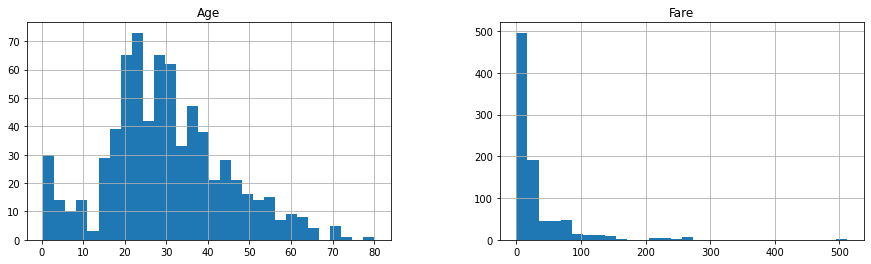

In [38]:
data[cont_vars].hist(bins=30, figsize=(15, 4))
plt.show()

### Transformaciones
#### Neo_Johnson

In [39]:
temp_yj = data.copy()

In [40]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

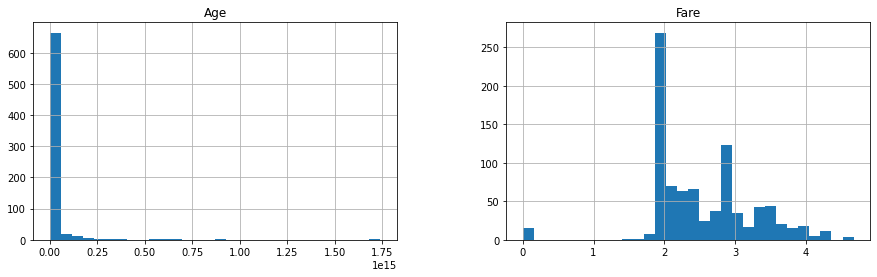

In [41]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 4))
plt.show()

#### Transformación Log

In [42]:
temp_log = data.copy()

for var in cont_vars:
    temp_log[var] = np.log(temp_log[var] + 1)

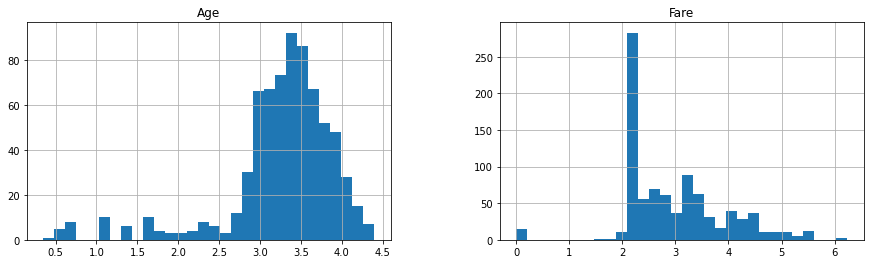

In [43]:
temp_log[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

#### Transformación de Raíz

In [44]:
temp_sqrt = data.copy()
for var in cont_vars:
    temp_sqrt[var] = np.sqrt(temp_sqrt[var])

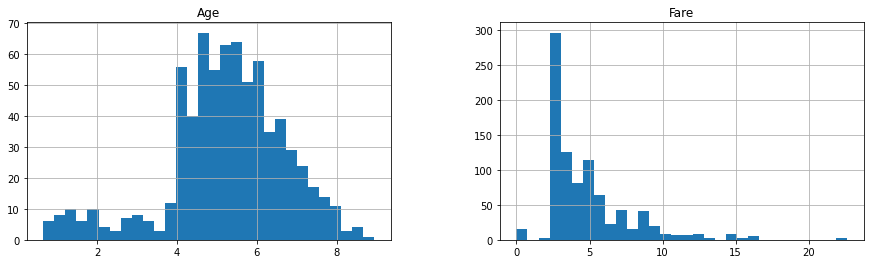

In [45]:
temp_sqrt[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

#### Transformación de Inverso

In [46]:
temp_divx = data.copy()
for var in cont_vars:
    temp_divx[var] = 1/(temp_divx[var]+1)

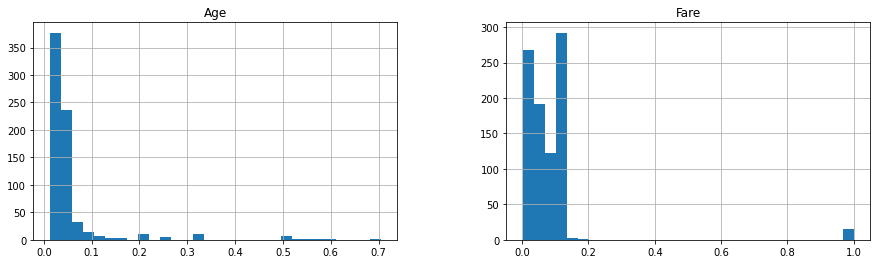

In [47]:
temp_divx[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

#### Transformación: elevado al cuadrado

In [48]:
temp_pow2 = data.copy()
for var in cont_vars:
    temp_pow2[var] = (temp_pow2[var]**2)

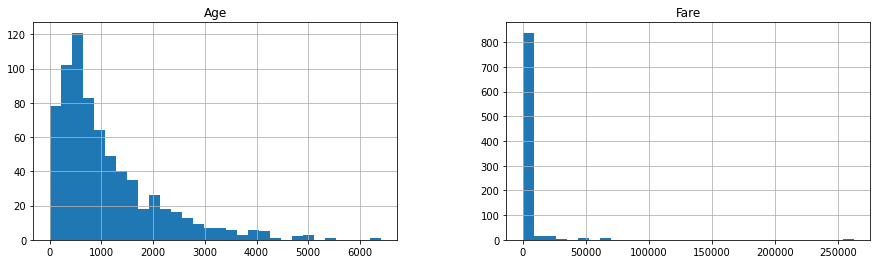

In [49]:
temp_pow2[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

## Selección de Transformaciones
* Age: para la variable *Age* seleccionamos la transformación Neo-Johnson
* Fare: para la variable *Fare* seleccionamos la transformación por logaritmo

In [50]:
data.Age = temp_sqrt.Age
data.Fare = temp_log.Fare

In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,4.690416,1,0,0.001122,2.110213,S
1,1,1,1,6.164414,1,0,0.001122,4.280593,C
2,1,3,1,5.099020,0,0,0.001122,2.188856,S
3,1,1,1,5.916080,1,0,0.002245,3.990834,S
4,0,3,0,5.916080,0,0,0.001122,2.202765,S


# Separación de datos de Train y Test

In [52]:
#separamos data para entrenamiento y prueba,
X_train, X_test, y_train, y_test = train_test_split(
                        data.drop(['Survived'], axis=1),
                        data['Survived'],
                        test_size=0.15,
                        random_state=2021)

# Sustitución de NA's

In [53]:
df = X_train.copy()

### Age

In [54]:
# Sustitución por media
df['Age_mean'] = df['Age'].fillna(df.Age.mean())
# Sustitución por mediana
df['Age_median'] = df['Age'].fillna(df.Age.median())
# Sustitución por moda
df['Age_mode'] = df['Age'].fillna(X_test.Age.mode()[0])
# Sustitución por 0
df['Age_0'] = df['Age'].fillna(0)
# Sustitución por 110
df['Age_10'] = df['Age'].fillna(10)
# Sustitución por valores random
random.seed(10)
df['Age_random'] = df['Age'].fillna(5+random.random()*random.randint(-2,2))
# Sustitución por KNN
imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_Imp = imputer.fit_transform(np.array(df.Age).reshape(-1, 1))
df['Age_KNN'] = knn_Imp

In [55]:
random.random()*random.randint(-1,1)

-0.48256167455085586

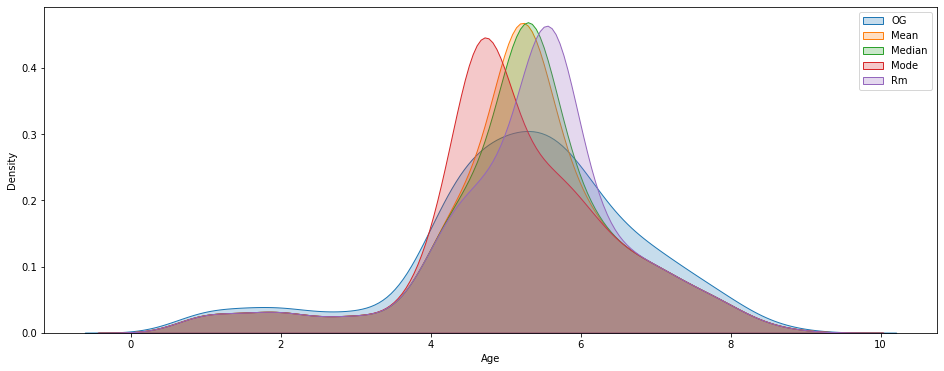

In [56]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
sns.set_palette("Set2")
sns.kdeplot(df['Age'], shade=True, label='OG')
sns.kdeplot(df['Age_mean'], shade=True, label='Mean')
sns.kdeplot(df['Age_median'], shade=True, label='Median')
sns.kdeplot(df['Age_mode'], shade=True, label='Mode')
#sns.kdeplot(df['Age_KNN'], shade=True, label='KNN')
#sns.kdeplot(df['Age_0'], shade=True, label='0')
#sns.kdeplot(df['Age_10'], shade=True, label='10')
sns.kdeplot(df['Age_random'], shade=True, label='Rm')
plt.legend()
plt.show()

In [57]:
X_train.groupby(['Age']).size()

Age
0.648074    1
0.818535    1
0.866025    2
0.911043    2
0.959166    1
           ..
8.366600    2
8.396428    1
8.426150    1
8.602325    1
8.944272    1
Length: 87, dtype: int64

* Se seleccionó la imputación por moda.

In [58]:
X_train['Age'] = X_train.Age.fillna(X_test.Age.mode()[0])
X_test['Age'] = X_test.Age.fillna(X_test.Age.mode()[0])

### Embarked

In [59]:
X_train.Embarked.value_counts()

S    546
C    147
Q     63
Name: Embarked, dtype: int64

In [60]:
# Sustitución por S
df['Embarked_S'] = df['Embarked'].fillna('S')
df['Embarked_S'] = df['Embarked_S'].apply(lambda x : enc_embarked[x])
# Sustitución por C
df['Embarked_C'] = df['Embarked'].fillna('C')
df['Embarked_C'] = df['Embarked_C'].apply(lambda x : enc_embarked[x])
# Sustitución por Q
df['Embarked_Q'] = df['Embarked'].fillna('Q')
df['Embarked_Q'] = df['Embarked_Q'].apply(lambda x : enc_embarked[x])
# Sustitución por Na
df['Embarked_Na'] = df['Embarked'].fillna('Na')
df['Embarked_Na'] = df['Embarked_Na'].apply(lambda x : enc_embarked[x])

df['Embarked'] = df['Embarked'].dropna().apply(lambda x : enc_embarked[x])

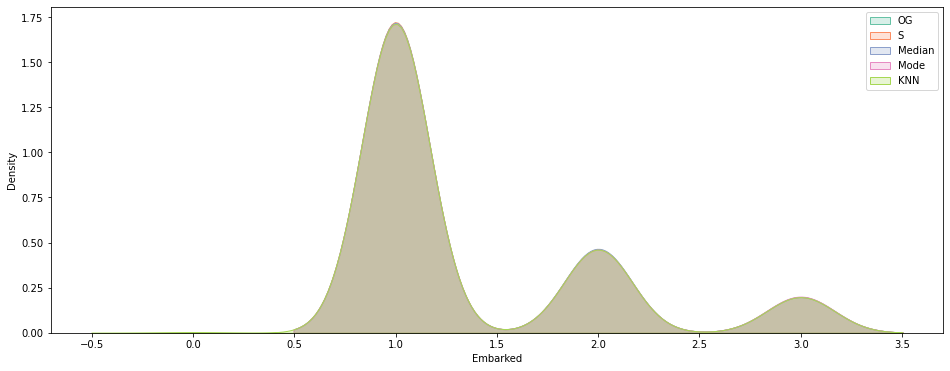

In [61]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
sns.set_palette("Set2")
sns.kdeplot(df['Embarked'], shade=True, label='OG')
sns.kdeplot(df['Embarked_S'], shade=True, label='S')
sns.kdeplot(df['Embarked_C'], shade=True, label='Median')
sns.kdeplot(df['Embarked_Q'], shade=True, label='Mode')
sns.kdeplot(df['Embarked_Na'], shade=True, label='KNN')
plt.legend()
plt.show()

In [62]:
X_train.Embarked = X_train.Embarked.fillna('S')
X_train.Embarked = X_train.Embarked.apply(lambda x : enc_embarked[x])
X_test.Embarked = X_test.Embarked.fillna('S')
X_test.Embarked = X_test.Embarked.apply(lambda x : enc_embarked[x])

In [63]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
856,1,1,6.708204,1,1,0.002245,5.111184,1
685,2,0,5.000000,1,2,0.003367,3.751366,2
95,3,0,4.690416,0,0,0.001122,2.202765,1
419,3,1,3.162278,0,2,0.003367,3.224858,1
208,3,1,4.000000,0,0,0.001122,2.169054,3


In [64]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 856 to 116
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    757 non-null    int64  
 1   Sex       757 non-null    int64  
 2   Age       757 non-null    float64
 3   SibSp     757 non-null    int64  
 4   Parch     757 non-null    int64  
 5   Ticket    757 non-null    float64
 6   Fare      757 non-null    float64
 7   Embarked  757 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 53.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 210 to 799
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    134 non-null    int64  
 1   Sex       134 non-null    int64  
 2   Age       134 non-null    float64
 3   SibSp     134 non-null    int64  
 4   Parch     134 non-null    int64  
 5   Ticket    134 non-null    float64
 6   Fare      134 non-null    floa

(None, None)

# Normalizar los Datos

In [65]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [66]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,1.0,0.730471,0.125,0.166667,0.166667,0.818980,0.0
1,0.5,0.0,0.524569,0.125,0.333333,0.333333,0.601092,0.5
2,1.0,0.0,0.487252,0.000,0.000000,0.000000,0.352955,0.0
3,1.0,1.0,0.303055,0.000,0.333333,0.333333,0.516728,0.0
4,1.0,1.0,0.404032,0.000,0.000000,0.000000,0.347554,1.0


In [67]:
#Guardamos dataset con data preparada para entrenamiento.

X_train.to_csv('prep_Xtrain.csv', index=False)
X_test.to_csv('prep_Xtest.csv', index=False)

y_train.to_csv('prep_ytrain.csv', index=False)
y_test.to_csv('prep_ytest.csv', index=False)

In [68]:
joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']